# Lab 2: Text Classification with Python


# Laboratory Session: Text Classification with SMS Spam Detection Dataset

## Objectives
This laboratory session aims to provide hands-on experience with text preprocessing, vectorization, and classification techniques using a real-world SMS spam detection dataset. Students will:

- Learn and implement text preprocessing and cleaning.
- Explore various text vectorization techniques.
- Understand and apply TF-IDF transformation.
- Build and evaluate text classification models.
- Analyze model performance and make improvements.

## Dataset Information
- **Dataset**: SMS Spam Collection Dataset
- **Source**: `SPAM text message 20170820 Data.csv`
- **Total Samples**: 5,572 messages

### Features
- **Category**: Message label (`spam`/`ham`).
- **Message**: Text content of the SMS.

---

## Tasks to be Performed

### 1. Data Loading and Exploration
- Load and examine the dataset.
- Perform initial statistical analysis.
- Visualize data distribution.

### 2. Text Preprocessing
- Implement text cleaning.
- Handle special characters and numbers.
- Perform tokenization.
- Remove stopwords.
- Apply lemmatization.

### 3. Text Vectorization
- Implement Bag of Words (CountVectorizer).
- Implement TF-IDF Vectorization.
- Explore and implement n-grams.
- Compare different vectorization approaches.

### 4. Model Implementation
- Split data into training and testing sets.
- Implement Naive Bayes Classifier.
- Train and evaluate the model.
- Analyze model performance.

In [65]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [66]:
# Download required NLTK data
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1. Data Loading and Exploration


In [67]:
# Load the dataset
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv')

In [68]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

Dataset Shape: (5572, 2)

First few rows of the dataset:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [69]:
# Check class distribution
class_distribution = df['Category'].value_counts()
print("\nClass Distribution:")
print(class_distribution)
print("\nClass Distribution (Percentage):")
print(df['Category'].value_counts(normalize=True) * 100)


Class Distribution:
Category
ham     4825
spam     747
Name: count, dtype: int64

Class Distribution (Percentage):
Category
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


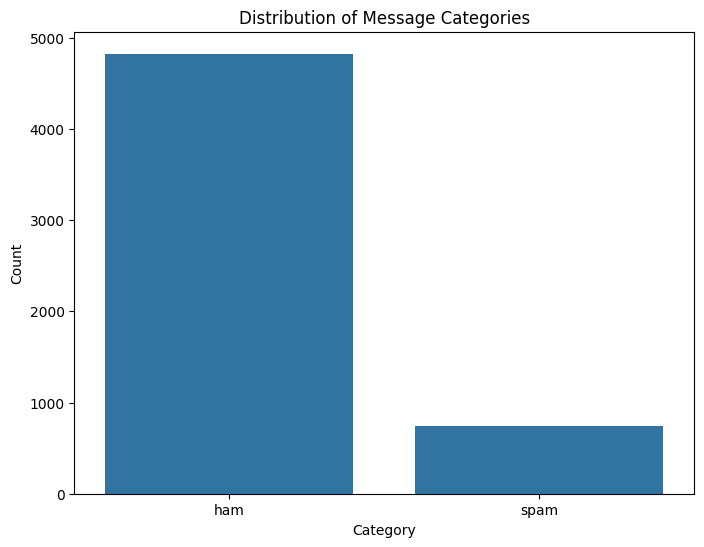

In [70]:

# Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title('Distribution of Message Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [71]:
# Basic text analysis
df['message_length'] = df['Message'].apply(len)
print("\nMessage Length Statistics:")
print(df.groupby('Category')['message_length'].describe())


Message Length Statistics:
           count       mean        std  min    25%    50%    75%    max
Category                                                               
ham       4825.0   71.44829  58.434864  2.0   33.0   52.0   93.0  910.0
spam       747.0  137.98929  29.980287  7.0  132.0  149.0  157.0  223.0


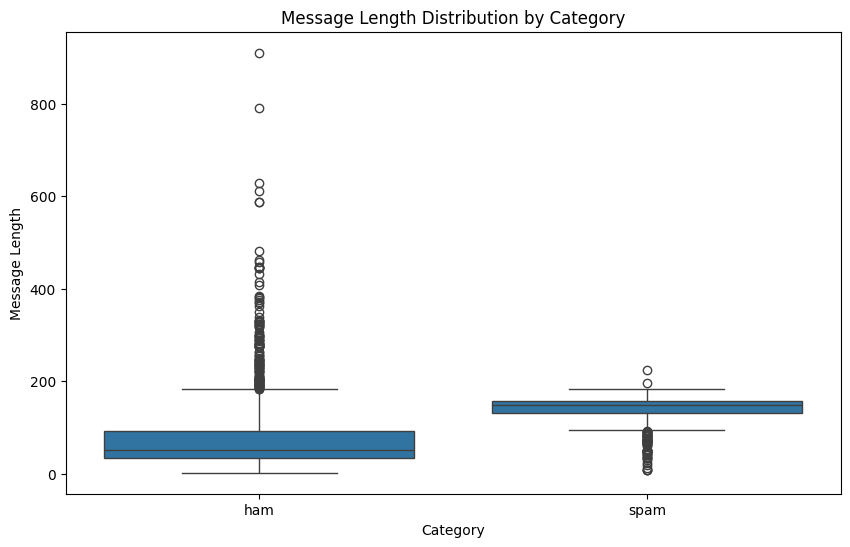

In [72]:
# Visualize message length distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Category', y='message_length')
plt.title('Message Length Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Message Length')
plt.show()

In [74]:
# Display some example messages from each category
print("\nExample Ham Messages:")
print(df[df['Category'] == 'ham']['Message'].head(3))
print("\nExample Spam Messages:")
print(df[df['Category'] == 'spam']['Message'].head(3))



Example Ham Messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
Name: Message, dtype: object

Example Spam Messages:
2    Free entry in 2 a wkly comp to win FA Cup fina...
5    FreeMsg Hey there darling it's been 3 week's n...
8    WINNER!! As a valued network customer you have...
Name: Message, dtype: object


In [75]:
# Get most common words in each category
from collections import Counter
import string

def get_words(text):
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in words]
    # Remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    return words

# Get common words for each category
ham_words = []
spam_words = []

for message in df[df['Category'] == 'ham']['Message']:
    ham_words.extend(get_words(message))

for message in df[df['Category'] == 'spam']['Message']:
    spam_words.extend(get_words(message))

print("\nTop 10 most common words in Ham messages:")
print(Counter(ham_words).most_common(10))

print("\nTop 10 most common words in Spam messages:")
print(Counter(spam_words).most_common(10))


Top 10 most common words in Ham messages:
[('i', 2194), ('you', 1841), ('to', 1562), ('the', 1129), ('a', 1064), ('u', 985), ('and', 849), ('in', 815), ('me', 761), ('my', 747)]

Top 10 most common words in Spam messages:
[('to', 686), ('a', 378), ('call', 344), ('you', 287), ('your', 263), ('free', 216), ('for', 203), ('the', 201), ('now', 189), ('or', 188)]


### 2. Text Preprocessing

In [76]:
def preprocess_text(text):
    """
    Preprocesses text data for classification.
    Steps: lowercase, remove special chars, tokenize, remove stopwords, lemmatize
    """
    # Convert to lowercase
    text = str(text).lower()

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords (keeping some important ones for spam detection)
    stop_words = set(stopwords.words('english')) - {'free', 'call', 'now', 'txt', 'text'}
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return ' '.join(tokens)


In [106]:
# Apply preprocessing to messages
print("Starting text preprocessing...")
df['processed_text'] = df['Message'].apply(preprocess_text)

print("\nShowing examples of preprocessed messages:")
print(df[['Category', 'Message', 'processed_text']].head())

Starting text preprocessing...

Showing examples of preprocessed messages:
  Category                                            Message  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4           nah dont think go usf life around though  


### 3. Text Vectorization


In [107]:
# Implementing Bag of Words vectorization
print("\nImplementing Bag of Words vectorization...")
count_vectorizer = CountVectorizer(
    ngram_range=(1, 2),  # Include both unigrams and bigrams
    max_features=5000,   # Limit vocabulary size
    min_df=2            # Remove terms that appear in less than 2 documents
)
X_bow = count_vectorizer.fit_transform(df['processed_text'])

# Implementing TF-IDF vectorization
print("\nImplementing TF-IDF vectorization...")
tfidf_vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_features=5000,
    min_df=2
)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Display vectorization results
print("\nShape of feature matrices:")
print(f"Bag of Words Matrix Shape: {X_bow.shape}")
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")


Implementing Bag of Words vectorization...

Implementing TF-IDF vectorization...

Shape of feature matrices:
Bag of Words Matrix Shape: (5572, 5000)
TF-IDF Matrix Shape: (5572, 5000)


In [108]:
# Show example features
print("\nExample features (first 10 from BoW):")
feature_names = list(count_vectorizer.vocabulary_.keys())
print(feature_names[:10])




Example features (first 10 from BoW):
['go', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'cine', 'got']


In [109]:
# Add message length as additional feature
df['message_length'] = df['Message'].str.len()

In [111]:
# Combine sparse matrices with message length feature
from scipy.sparse import hstack
X_bow_with_length = hstack([X_bow, df[['message_length']].values.reshape(-1, 1)])
X_tfidf_with_length = hstack([X_tfidf, df[['message_length']].values.reshape(-1, 1)])

print("\nFinal feature matrix shapes:")
print(f"BoW with length feature: {X_bow_with_length.shape}")
print(f"TF-IDF with length feature: {X_tfidf_with_length.shape}")



Final feature matrix shapes:
BoW with length feature: (5572, 5001)
TF-IDF with length feature: (5572, 5001)


In [112]:
# Prepare target variable
y = (df['Category'] == 'spam').astype(int)

# Save processed data
import joblib
joblib.dump(count_vectorizer, 'count_vectorizer.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("\nPreprocessing complete!")


Preprocessing complete!


### 4. Model Implementation


In [83]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [84]:
# Split the data
X_bow_train, X_bow_test, X_tfidf_train, X_tfidf_test, y_train, y_test = train_test_split(
    X_bow_with_length, X_tfidf_with_length, y,
    test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_bow_train.shape)
print("Testing set shape:", X_bow_test.shape)


Training set shape: (4457, 5001)
Testing set shape: (1115, 5001)


In [85]:
# Train and evaluate models
def train_and_evaluate_model(X_train, X_test, model_name):
    # Initialize and train the model
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = nb_model.predict(X_test)

    # Print evaluation metrics
    print(f"\nResults for {model_name}:")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Perform cross-validation
    cv_scores = cross_val_score(MultinomialNB(), X_train, y_train, cv=5)
    print(f"\nCross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return nb_model


Training Bag of Words model...

Results for Bag of Words:

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.98      0.85      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



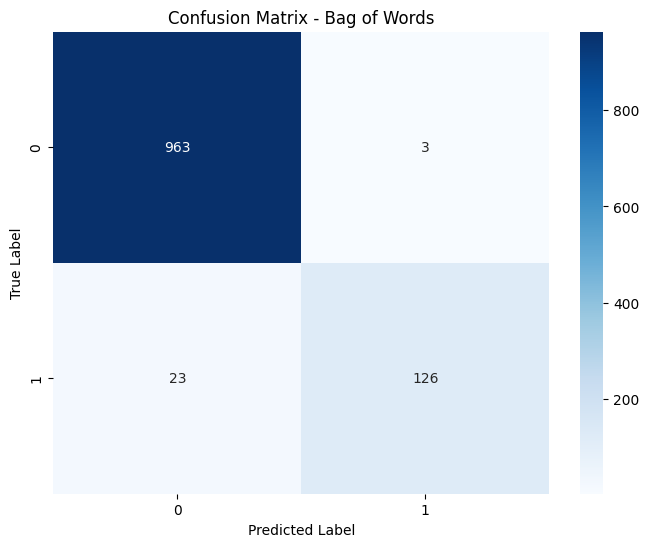


Cross-validation scores: [0.97421525 0.96860987 0.98428732 0.97867565 0.97979798]
Average CV score: 0.977 (+/- 0.011)

Training TF-IDF model...

Results for TF-IDF:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       966
           1       1.00      0.52      0.68       149

    accuracy                           0.94      1115
   macro avg       0.97      0.76      0.82      1115
weighted avg       0.94      0.94      0.93      1115



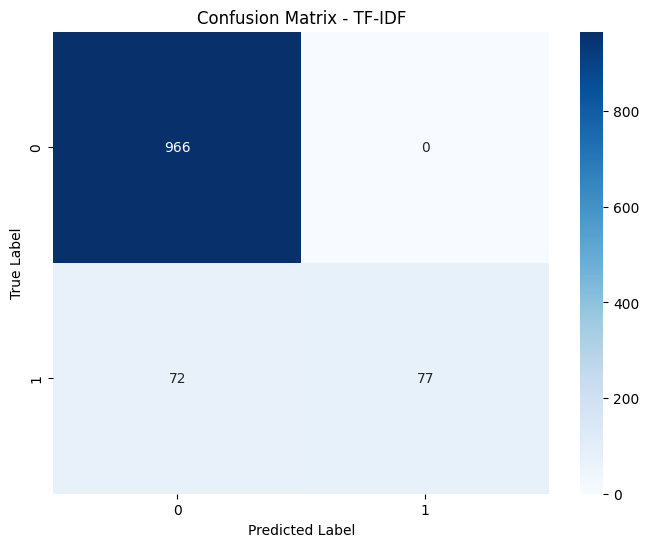


Cross-validation scores: [0.89798206 0.89573991 0.8956229  0.89113356 0.89113356]
Average CV score: 0.894 (+/- 0.005)


In [86]:
# Train and evaluate BoW model
print("\nTraining Bag of Words model...")
bow_model = train_and_evaluate_model(X_bow_train, X_bow_test, "Bag of Words")

# Train and evaluate TF-IDF model
print("\nTraining TF-IDF model...")
tfidf_model = train_and_evaluate_model(X_tfidf_train, X_tfidf_test, "TF-IDF")

In [89]:
# Feature importance analysis for BoW model
def analyze_feature_importance(model, vectorizer, n_top_features=20):
    """
    Analyzes and visualizes feature importance for the spam classification model
    """
    # Get feature names from vectorizer
    feature_names = list(vectorizer.get_feature_names_out())

    # Calculate feature importance (difference in log probabilities)
    feature_importance = model.feature_log_prob_[1, :-1] - model.feature_log_prob_[0, :-1]

    # Create DataFrame for feature importance
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    })

    # Sort features by absolute importance
    importance_df['abs_importance'] = abs(importance_df['importance'])
    importance_df = importance_df.sort_values('abs_importance', ascending=False)

    # Plot top features
    plt.figure(figsize=(12, 6))
    colors = ['red' if x < 0 else 'green' for x in importance_df['importance'][:n_top_features]]

    plt.bar(range(n_top_features),
            importance_df['importance'][:n_top_features],
            color=colors)

    plt.xticks(range(n_top_features),
               importance_df['feature'][:n_top_features],
               rotation=45,
               ha='right')

    plt.title('Top Features for Spam Classification')
    plt.xlabel('Features')
    plt.ylabel('Importance Score (Log Probability Difference)')
    plt.tight_layout()
    plt.show()

    # Print top spam and ham indicators
    print("\nTop SPAM indicators (positive importance):")
    spam_indicators = importance_df[importance_df['importance'] > 0].head(10)
    print(spam_indicators[['feature', 'importance']].to_string())

    print("\nTop HAM indicators (negative importance):")
    ham_indicators = importance_df[importance_df['importance'] < 0].head(10)
    print(ham_indicators[['feature', 'importance']].to_string())

    return importance_df


Analyzing feature importance...


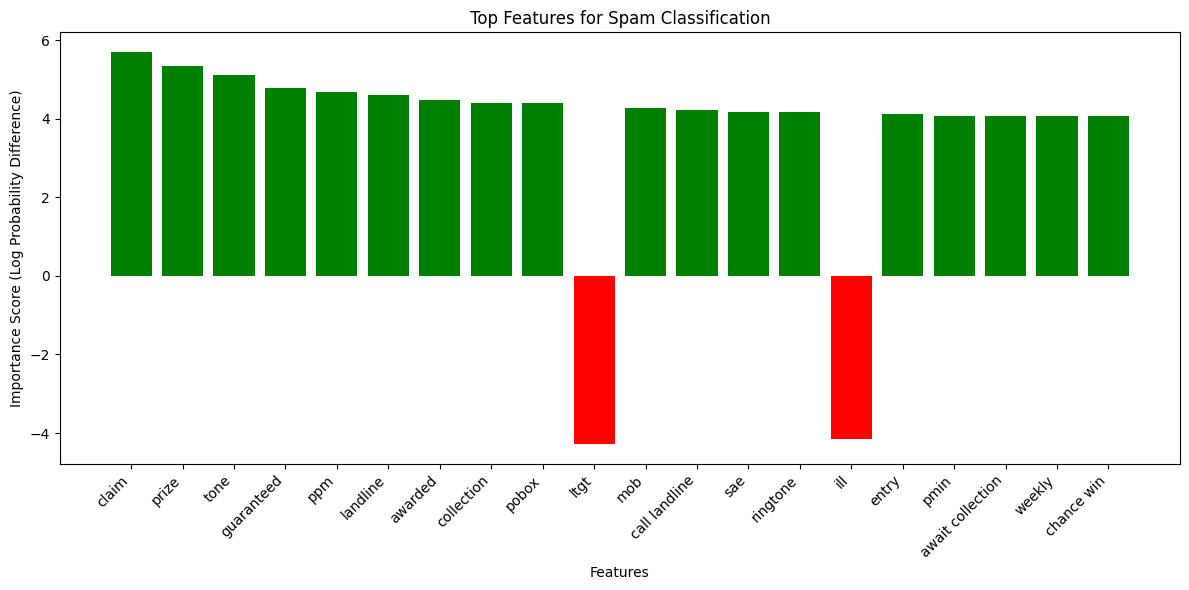


Top SPAM indicators (positive importance):
         feature  importance
636        claim    5.701385
3119       prize    5.341729
4255        tone    5.107329
1589  guaranteed    4.774623
3094         ppm    4.692385
2085    landline    4.602773
224      awarded    4.469241
689   collection    4.395133
3044       pobox    4.395133
2511         mob    4.272531

Top HAM indicators (negative importance):
       feature  importance
2299      ltgt   -4.283498
1832       ill   -4.151230
2243       lor   -3.738160
2104     later   -3.554311
4080     thats   -3.317310
95         amp   -3.193696
183        ask   -3.139629
132   anything   -3.125643
3463      said   -3.082471
1747      home   -3.060165


In [90]:
# Analyze importance for text features only
print("\nAnalyzing feature importance...")
importance_df = analyze_feature_importance(bow_model, count_vectorizer)


In [103]:
# Function to show example predictions with their probabilities
def show_example_predictions(model, X_test, y_test, original_texts, n_examples=5):
    """
    Show example predictions from the model.

    Parameters:
    -----------
    model : trained model object
    X_test : sparse matrix of test features
    y_test : array-like of test labels
    original_texts : array-like of original message texts
    n_examples : int, number of examples to show
    """
    # Convert y_test to numpy array if it's a pandas series
    y_test_array = np.array(y_test)

    # Get random indices
    n_samples = X_test.shape[0]
    random_indices = np.random.RandomState(42).choice(n_samples, n_examples, replace=False)

    print("\nExample Predictions:")
    print("-" * 70)

    for idx in random_indices:
        # Get the feature vector for this example
        X_example = X_test[idx]

        # Make prediction and get probability
        pred = model.predict(X_example)
        prob = model.predict_proba(X_example)

        # Get actual label
        actual = y_test_array[idx]

        # Get original message
        original_message = original_texts.iloc[idx]

        # Print results
        print(f"Original Message: {original_message}")
        print(f"Actual Label: {'spam' if actual == 1 else 'ham'}")
        print(f"Predicted Label: {'spam' if pred[0] == 1 else 'ham'}")
        print(f"Probability of being spam: {prob[0][1]:.3f}")
        print("-" * 70)

In [104]:
# Store original messages and true labels before splitting
original_messages = df['Message'].copy()
true_labels = y.copy()

# Split the data including original messages
X_bow_train, X_bow_test, X_tfidf_train, X_tfidf_test, y_train, y_test, messages_train, messages_test = train_test_split(
    X_bow_with_length, X_tfidf_with_length, y, original_messages,
    test_size=0.2, random_state=42, stratify=y
)


In [105]:

# Show predictions for BoW model
print("\nBag of Words Model Predictions:")
show_example_predictions(bow_model, X_bow_test, y_test, messages_test)

# Show predictions for TF-IDF model
print("\nTF-IDF Model Predictions:")
show_example_predictions(tfidf_model, X_tfidf_test, y_test, messages_test)


Bag of Words Model Predictions:

Example Predictions:
----------------------------------------------------------------------
Original Message: TheMob>Hit the link to get a premium Pink Panther game, the new no. 1 from Sugababes, a crazy Zebra animation or a badass Hoody wallpaper-all 4 FREE!
Actual Label: spam
Predicted Label: ham
Probability of being spam: 0.027
----------------------------------------------------------------------
Original Message: U're welcome... Caught u using broken english again...
Actual Label: ham
Predicted Label: ham
Probability of being spam: 0.032
----------------------------------------------------------------------
Original Message: Haiyoh... Maybe your hamster was jealous of million
Actual Label: ham
Predicted Label: ham
Probability of being spam: 0.012
----------------------------------------------------------------------
Original Message: K..k..i'm also fine:)when will you complete the course?
Actual Label: ham
Predicted Label: ham
Probability of being